## Factors Contributing to High Earnings in Professional Athletes: An Unsupervised and Supervised Learning Approach
#### By: Christopher Wille

### Introduction
In the ever-growing professional sports industry, top athletes earn exorbitant salaries and enjoy lucrative endorsement deals. However, the underlying factors that contribute to their success and wealth remain somewhat obscure. With this project, my primary objective is to conduct a thorough analysis of a dataset containing information on the highest-paid athletes and identify any patterns or correlations that may explain why certain athletes earn more than others. By employing supervised learning techniques, I intend to delve deeper into the data and uncover any hidden relationships that could potentially shed light on why some athletes achieve greater success than others. The potential insights gleaned from this project could prove to be invaluable for the sports industry and could be leveraged by teams, organizations, and fans alike to make more informed decisions when it comes to hiring and paying athletes. At present, there exists a dearth of comprehensive solutions or workarounds for this specific problem, which further underscores the importance and urgency of this project. Ultimately, the findings of this project could have far-reaching implications and serve as a crucial resource for shaping future decision-making in the professional sports industry.


### Goals

The main goal of this multifaceted project is to delve into the intricacies of the professional sports industry and identify the crucial factors that contribute to the high earnings of top athletes. To accomplish this, a comprehensive analysis of the dataset will be conducted, and various parameters such as sport, year of payment, and nationality will be scrutinized. By meticulously examining these factors and unearthing any correlations or patterns that may exist, the project will attempt to unveil the reasons why some athletes earn more than others. Additionally, the development of a predictive model that can identify a player's sport based on other parameters in the dataset will be a crucial element of this project. The ultimate goal is to generate valuable insights into the underlying factors that drive the success of professional athletes and assist in making informed decisions within the sports industry. Since there are currently no comprehensive solutions or workarounds for this specific problem, the outcomes of this project will make a significant contribution to the field and potentially shape the future directions for the industry and the fervent fans who are keenly interested in what factors contribute to the salary of their favorite athletes.

### Methodology

To facilitate the analysis of the data and uncover any hidden relationships between variables, an unsupervised learning approach will be employed. The data will be imported and manipulated using Python's Pandas library, and to gain better insights and explore the data more thoroughly, Matplotlib and Seaborn will also be utilized. Prior to conducting the analysis, it is crucial to ensure the accuracy of the results. To achieve this, the data will be preprocessed by removing any missing or duplicate values and encoding categorical variables. The process will then begin of use data analyzing tactics to see what potential features correlate to their very high ranking in the dataset. Then, the data will be divided into training and testing sets for further analysis. A variety of supervised learning algorithms, such as using various Machine Learning estimators. Additionally, further analysis will be conducted to answer specific questions regarding the top-20 highest paid athletes in the dataset. To evaluate the performance of each model, several metrics, including accuracy score and mean squared error, will be utilized. Finally, based on the results, the best-performing model will be selected, and cross-validation will be used to determine the optimal hyperparameters.

### Get the Data

#### Figure 1

In [1]:
import pandas as pd
#Loading the data in using the Pandas library
data = pd.read_csv("Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv")
data

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
...,...,...,...,...,...,...,...,...
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5


Figure 1 is a dataset with the following column names and data type of each column:
* Current Rank -  Where they rank in Forbe's most recent list: int64
* Nationality - Nationality of the athlete: object
* S.NO - Rank in the entire dataset: int64
* Name - Name of the athlete: object
* earnings ($ million) - Earnings the year the athlete was ranked: float64
* Sport - Sport the athlete made the earnings from: object
* Year - Year the athlete earned the money: int64

There is 300 rows as of now in the dataset.

### Data Exploration

To start the exploration off in the barest bones ways possible, let’s just start off with a simple correlation matrix which will compare all the features to one another. This will give us an initial idea of how the features in the dataset are connected or lack thereof. In data analysis, a correlation matrix is a table that shows the correlation coefficients between a set of variables. The correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. It ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no correlation. By using a correlation matrix, one can quickly see which features in a dataset are strongly correlated with each other and which are not. For example, if two features have a high positive correlation coefficient, it means that they tend to increase or decrease together. On the other hand, if two features have a high negative correlation coefficient, it means that they tend to have an inverse relationship, whereas one feature increases, the other decreases. By examining the correlation matrix, analysts can get an initial idea of how the features in a dataset are connected or not, which can be useful for further analysis and modeling. It can also help identify potential problems such as multicollinearity, which occurs when two or more features are highly correlated with each other, making it difficult to distinguish the effects of each feature on the target variable.

#### Figure 2

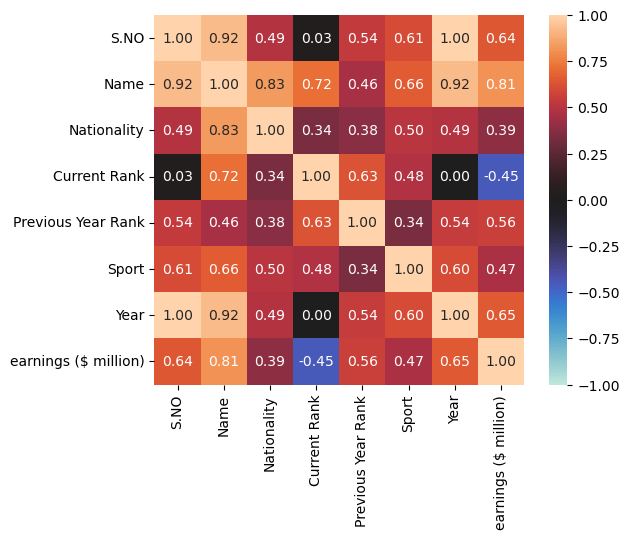

{'corr':                           S.NO      Name  Nationality  Current Rank  \
 S.NO                  1.000000  0.923645     0.489228      0.034739   
 Name                  0.923645  1.000000     0.833759      0.717030   
 Nationality           0.489228  0.833759     1.000000      0.336418   
 Current Rank          0.034739  0.717030     0.336418      1.000000   
 Previous Year Rank    0.537077  0.458894     0.379575      0.625602   
 Sport                 0.605782  0.661191     0.504143      0.484036   
 Year                  0.999090  0.924134     0.490013      0.001600   
 earnings ($ million)  0.641399  0.807533     0.388230     -0.449052   
 
                       Previous Year Rank     Sport      Year  \
 S.NO                            0.537077  0.605782  0.999090   
 Name                            0.458894  0.661191  0.924134   
 Nationality                     0.379575  0.504143  0.490013   
 Current Rank                    0.625602  0.484036  0.001600   
 Previous Year Ra

In [2]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
associations(data, nominal_columns='auto', 
             numerical_columns=None, mark_columns=False, 
             nom_nom_assoc='cramer', num_num_assoc='pearson',
             ax=None, 
             figsize=None, annot=True, fmt='.2f', cmap=None, 
             sv_color='silver', cbar=True, vmax=1.0, vmin=None,
             plot=True, compute_only=False, clustering=False, title=None, 
             filename=None)

As the color bar indicates, the features in the correlation matrix seem to be relatively strongly correlated with each other, meaning that there are potentially meaningful relationships among the variables that could be explored further. This initial observation is promising and suggests that there may be valuable insights to uncover from the data. To ensure the accuracy of the analysis, each column of the data will be analyzed for potential anomalies, such as missing data, incorrect labels, or repeated information. This is an important step in data cleaning and preparation, as any anomalies could impact the accuracy of the analysis. Additionally, the analyst has decided to exclude three of the variables - S.NO, Current Rank, and Previous Year Rank - from the analysis. These variables may be related to Forbes' ranking methodology rather than the earnings themselves, so including them in the analysis may not provide useful insights. This decision demonstrates an understanding of the specific research question and the importance of carefully selecting variables that are relevant to that question. Overall, the preliminary analysis of the correlation matrix suggests that the data is in a good state to move forward with the analysis, and that there may be useful insights to uncover. By carefully examining the data and selecting relevant variables, I will be able to start taking steps to ensure that the analysis is accurate and meaningful. 

#### Figure 3

In [3]:
data.groupby(data['Sport']).size()

Sport
American Football               17
American Football / Baseball     1
Auto Racing                     10
Auto Racing (Nascar)             2
Auto racing                      1
Baseball                         3
Basketball                      54
Boxing                          29
F1 Motorsports                   5
F1 racing                        8
Golf                            24
Hockey                           1
Ice Hockey                       2
MMA                              1
NASCAR                           3
NBA                              1
NFL                              3
Soccer                          22
Tennis                          18
auto racing                      7
baseball                         3
basketball                      27
boxing                          17
cycling                          1
golf                            20
ice hockey                       1
motorcycle gp                    4
soccer                          11
tennis        

#### Figure 4

(array([218.,   7.,  14.,  14.,   7.,  15.,  11.,  10.,   2.,   3.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

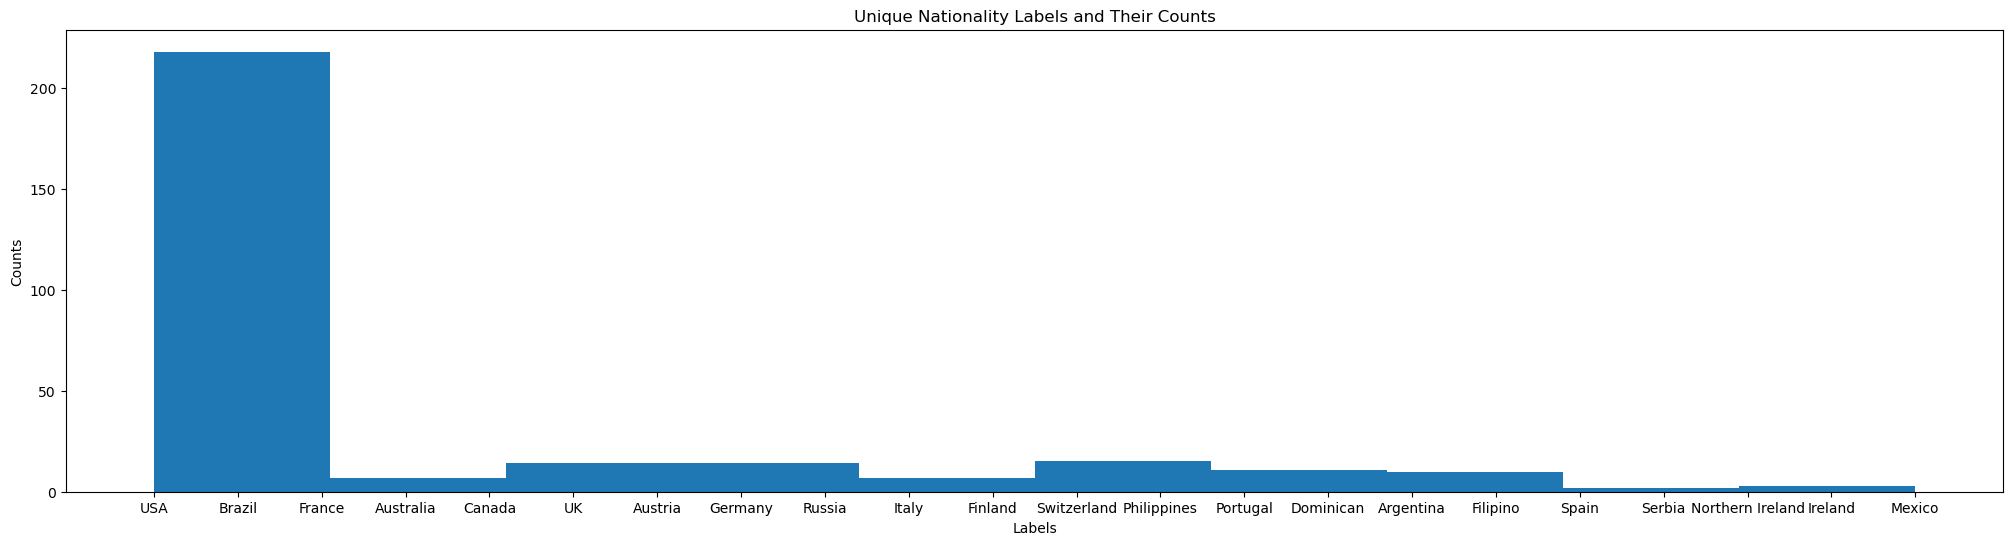

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,6))
plt.title("Unique Nationality Labels and Their Counts")
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.hist(data['Nationality'])

#### Figure 5

(array([30., 30., 30., 20., 31., 30., 30., 30., 30., 40.]),
 array([1990., 1993., 1996., 1999., 2002., 2005., 2008., 2011., 2014.,
        2017., 2020.]),
 <BarContainer object of 10 artists>)

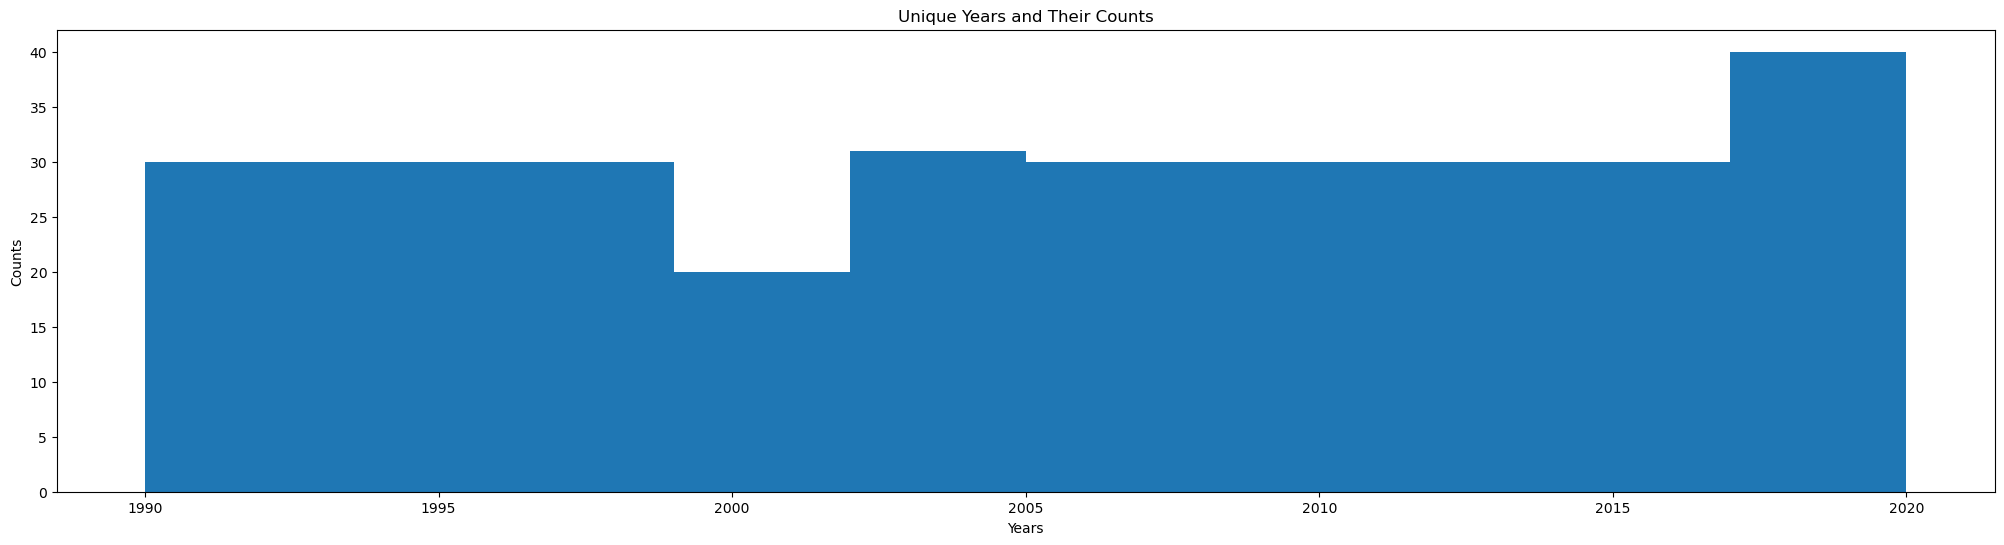

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,6))
plt.title("Unique Years and Their Counts")
plt.xlabel("Years")
plt.ylabel("Counts")
plt.hist(data['Year'])

#### Figure 6

(array([143., 100.,  41.,  13.,   1.,   1.,   0.,   0.,   0.,   2.]),
 array([  8.1 ,  37.29,  66.48,  95.67, 124.86, 154.05, 183.24, 212.43,
        241.62, 270.81, 300.  ]),
 <BarContainer object of 10 artists>)

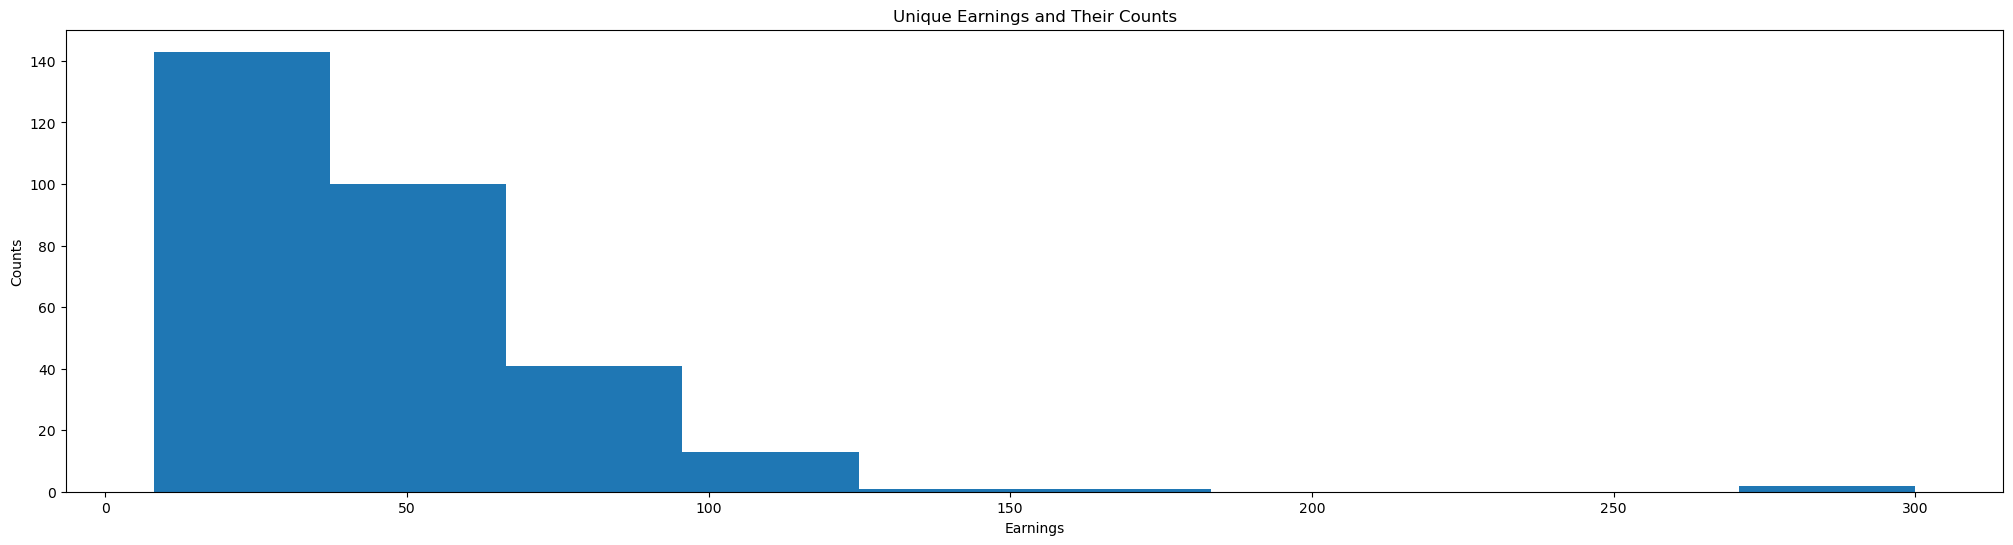

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(25,6))
plt.title("Unique Earnings and Their Counts")
plt.xlabel("Earnings")
plt.ylabel("Counts")
plt.hist(data['earnings ($ million)'])

#### Figure 7

In [7]:
print("Athlete Name Non-NA's:")
len(data['Name'].isna())

Athlete Name Non-NA's:


301

The 'Name' (Figure 7) and 'Sports' (Figure 3) columns were analyzed differently than the other columns due to the nature of the data they contain. The 'Name' column contains categorical data, specifically the names of over two hundred athletes, which requires different analysis techniques than numerical data. The 'Sports' column is also a categorical variable, and the analyst has noticed some inconsistencies in the labeling of the sports. Upon closer inspection, there are some sports are labeled as unique when in fact they are the same sport with different labels. For example, 'Hockey' and 'Ice Hockey' are both listed as unique sports, even though they are the same sport. This type of inconsistency could lead to inaccurate analysis and misleading results if not properly addressed. To address this issue, the analyst has decided to relabel some of the sports in the 'Sports' column. By consolidating redundant categories and ensuring consistent labeling across the dataset, the analyst can ensure that the analysis is accurate and meaningful. This process is called data cleaning, and it is an important step in preparing data for analysis. As for the other features, Figure 4 suggest a bias in the dataset to USA born athletes while Figure 5 implies there is a pretty even distribution of years of the athlete's earnings. Figure 6 shows the lower earnings make up a majority of the 'earnings ($ million)' feature.

#### Figure 8

In [8]:
#Make all sport labels lowercase for uniformity
import warnings
warnings.filterwarnings('ignore')
data['Sport'] = data['Sport'].map(str.lower)
for i in range(len(data['Sport'])):#Loop through the sport labels and change them based on if conditions
    if data["Sport"][i] == 'hockey':
        data["Sport"][i] = 'ice hockey'
    if data["Sport"][i] == 'nfl':
        data['Sport'][i] = 'american football'
    if(data["Sport"][i] == 'auto racing (nascar)' or data["Sport"][i] == 'f1 motorsports' 
       or data["Sport"][i] == 'f1 racing' or data["Sport"][i] == 'nascar' or data["Sport"][i] == 'motorcycle gp'):
        data['Sport'][i] = 'auto racing'
    if data["Sport"][i] == 'nba':
        data['Sport'][i] = 'basketball'
data.groupby(data['Sport']).size()

Sport
american football               20
american football / baseball     1
auto racing                     40
baseball                         6
basketball                      82
boxing                          46
cycling                          1
golf                            44
ice hockey                       4
mma                              1
soccer                          33
tennis                          23
dtype: int64

Now I can see that there are potential biases if the model I chose includes 'Sport' as a feature since there are more data entries for some sports than others. There are potential biases in the 'Name' feature to keep an eye out as well. The other features seem relatively even in terms label variance and there also did not seem to be any NA values. I will now use dummy variables on the object data type features so wI can develop correlation plots and maps comparing all the features to one another using the Seaborne library package. 'Name' will also not be included as a feature here on out since for the repeat athletes that are in there may create a bias in a model building process as well it would make sense, I would want the datapoints to be independent of who you are and more dependent on the statistics behind who you are if that makes sense. A target parameter of 'earnings ($ million)' would make sense as I want to see what correlates to the money the athlete makes. These correlation plots could give an early look at what features may be good for building a model later.

#### Figure 9

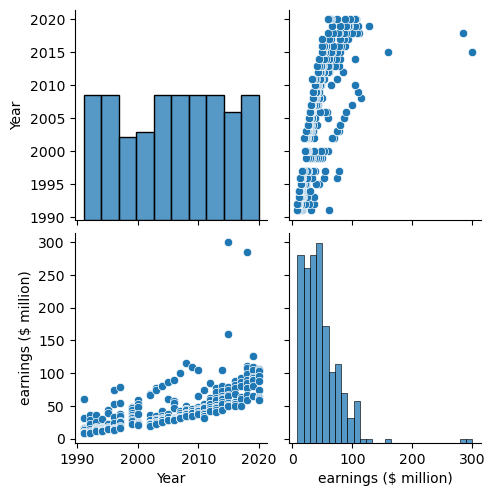

In [9]:
import seaborn as sns
temp_data = data.dropna().drop(['Current Rank',  'S.NO', 'Previous Year Rank', 'Name'], axis = 1)
temp_data = pd.get_dummies(temp_data, drop_first = True)
sns.pairplot(temp_data[['Year', 'earnings ($ million)']])


#### Figure 10

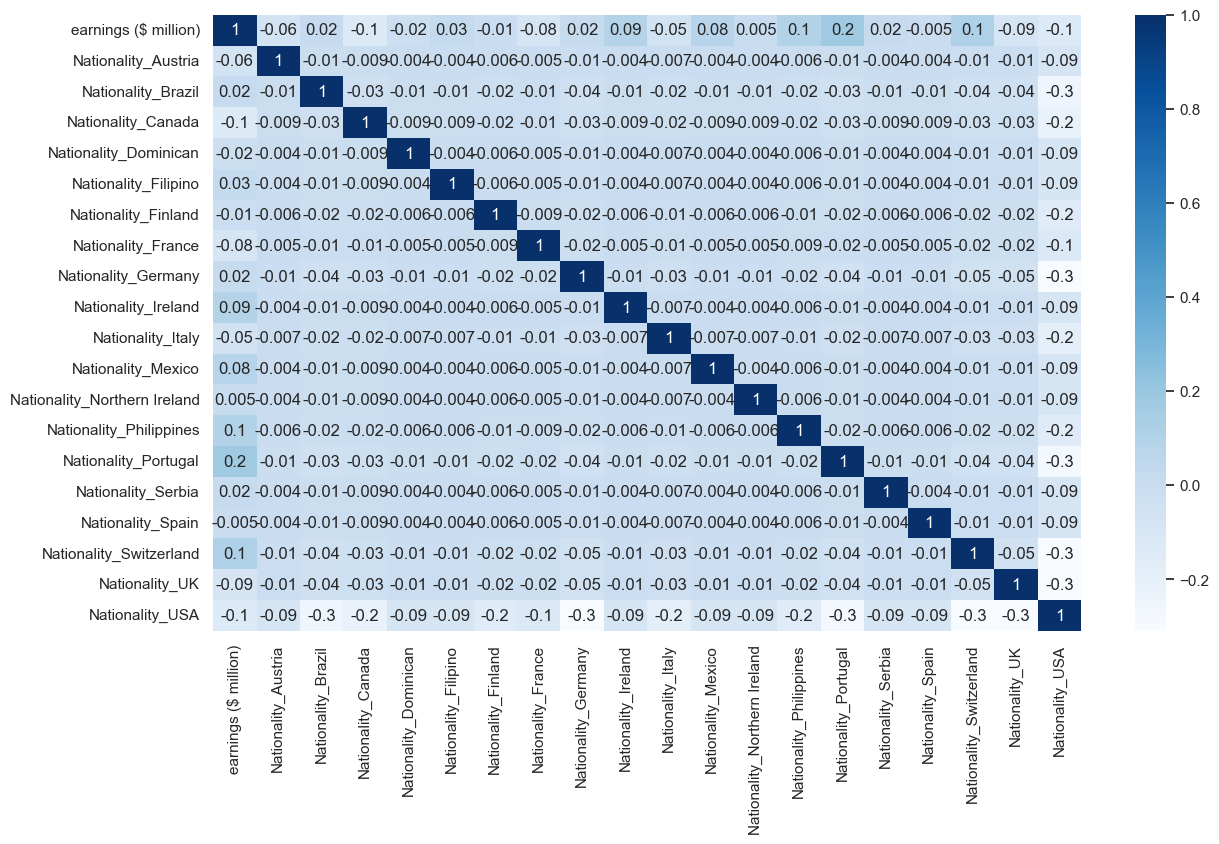

In [10]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = temp_data[['earnings ($ million)', 'Nationality_Austria', 'Nationality_Brazil', 'Nationality_Canada',
       'Nationality_Dominican', 'Nationality_Filipino', 'Nationality_Finland',
       'Nationality_France', 'Nationality_Germany', 'Nationality_Ireland',
       'Nationality_Italy', 'Nationality_Mexico',
       'Nationality_Northern Ireland', 'Nationality_Philippines',
       'Nationality_Portugal', 'Nationality_Serbia', 'Nationality_Spain',
       'Nationality_Switzerland', 'Nationality_UK', 'Nationality_USA']].corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')


#### Figure 11

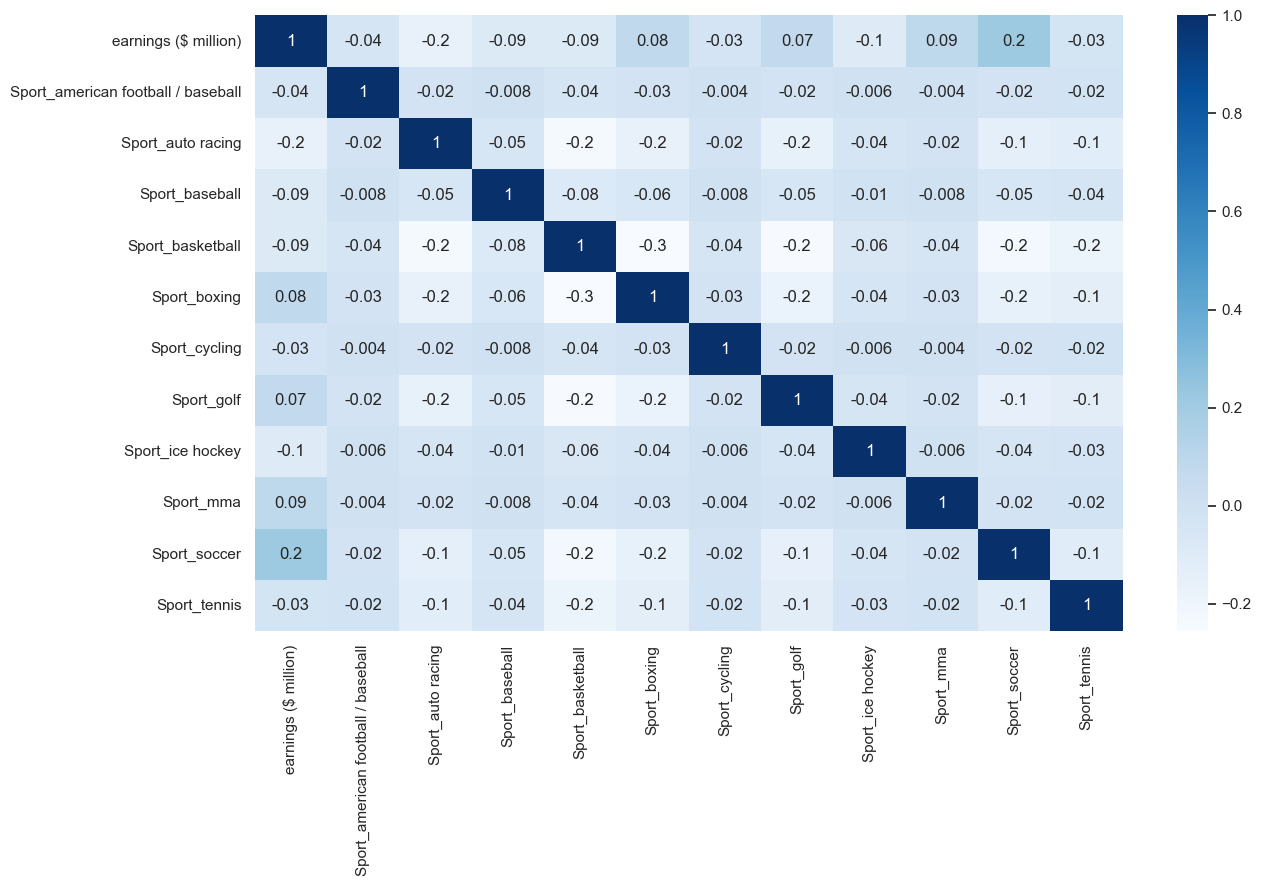

In [11]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = temp_data[['earnings ($ million)','Sport_american football / baseball',
       'Sport_auto racing', 'Sport_baseball', 'Sport_basketball',
       'Sport_boxing', 'Sport_cycling', 'Sport_golf', 'Sport_ice hockey',
       'Sport_mma', 'Sport_soccer', 'Sport_tennis', ]].corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

#### Figure 12

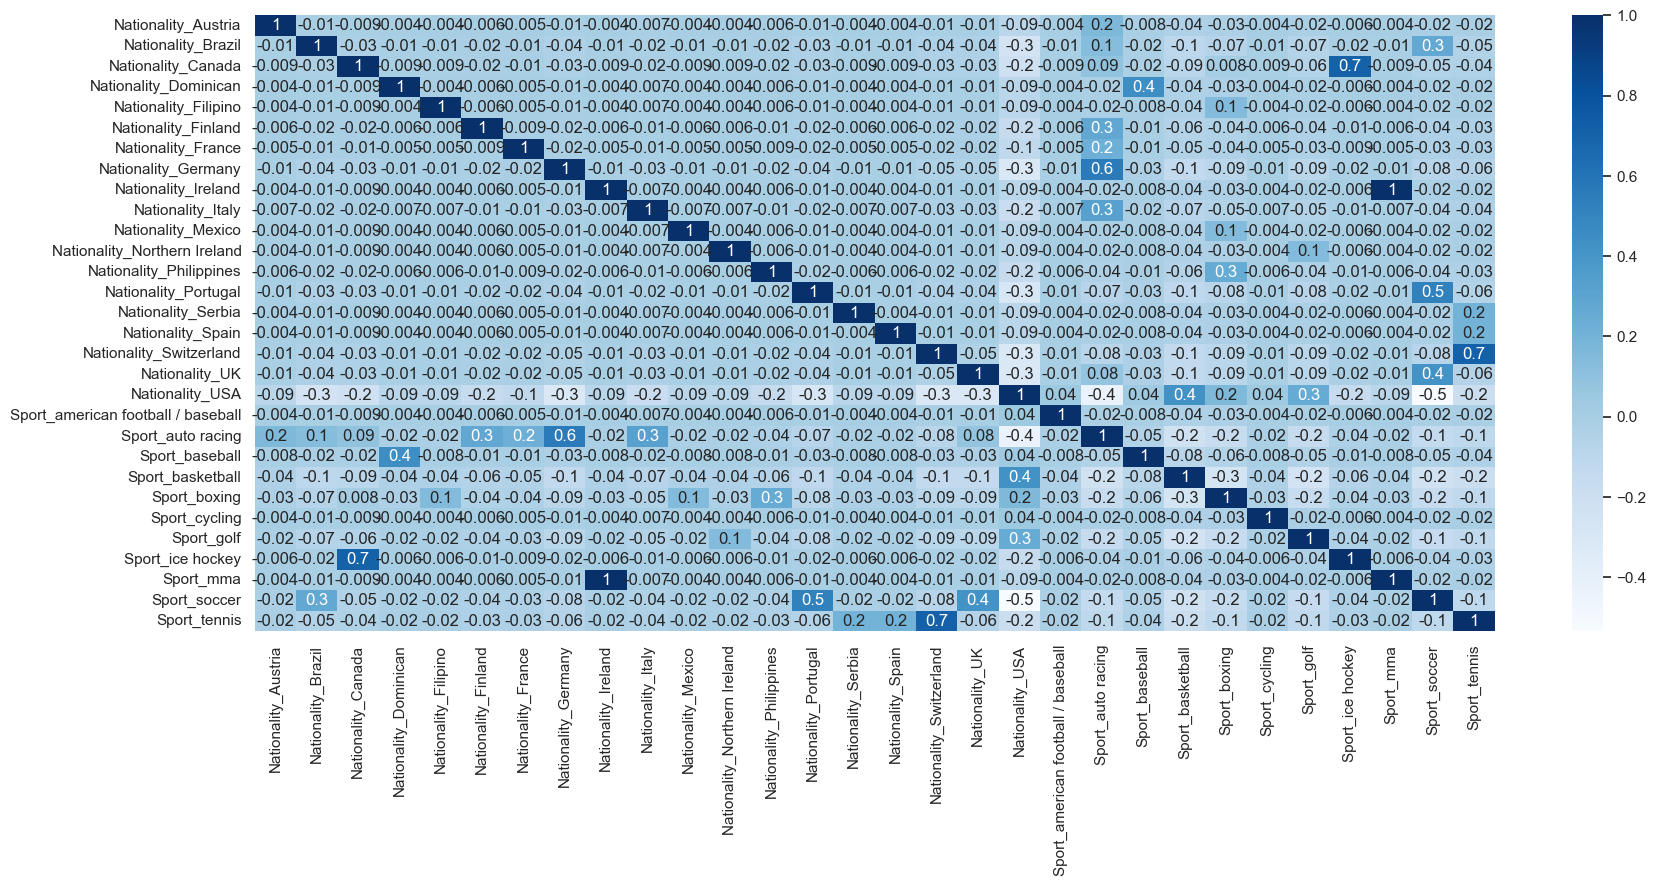

In [12]:
plt.figure(figsize=(20,8))
sns.set_theme(style="white")
corr = temp_data[['Nationality_Austria', 'Nationality_Brazil', 'Nationality_Canada',
       'Nationality_Dominican', 'Nationality_Filipino', 'Nationality_Finland',
       'Nationality_France', 'Nationality_Germany', 'Nationality_Ireland',
       'Nationality_Italy', 'Nationality_Mexico',
       'Nationality_Northern Ireland', 'Nationality_Philippines',
       'Nationality_Portugal', 'Nationality_Serbia', 'Nationality_Spain',
       'Nationality_Switzerland', 'Nationality_UK', 'Nationality_USA','Sport_american football / baseball',
       'Sport_auto racing', 'Sport_baseball', 'Sport_basketball',
       'Sport_boxing', 'Sport_cycling', 'Sport_golf', 'Sport_ice hockey',
       'Sport_mma', 'Sport_soccer', 'Sport_tennis', ]].corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

Regarding Figure 9, it appears that there is a clear positive correlation between the year and earnings, which is the strongest correlation that was analyzed. This could potentially be attributed to inflation or perhaps athletes being more highly valued over time, or a combination of both factors. Moving on to Figure 10 and Figure 11, it appears that they are both in a similar position, with the former examining the correlation between nationality and earnings and the latter looking at the correlation between sport and earnings. However, neither of them showed any particularly strong correlations. Figure 12, on the other hand, which examines the correlation between nationality and sport, yielded the second-strongest correlations. It will be interesting to see if this trend holds up not only in model building but also when analyzing the top-20 highest-paid athletes. Let's now take a look at the distribution of earnings across the three other features in question.

#### Figure 13

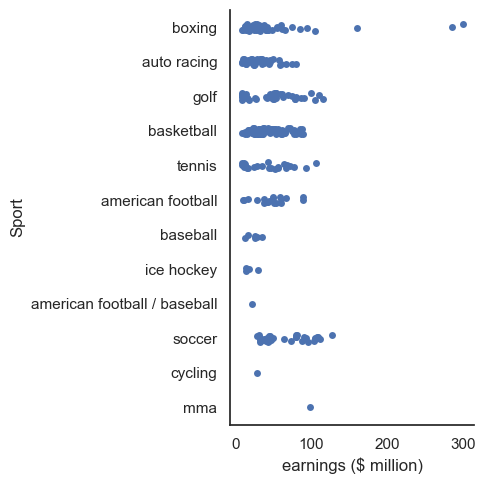

In [13]:
sns.catplot(data, x='earnings ($ million)', y="Sport")

#### Figure 14

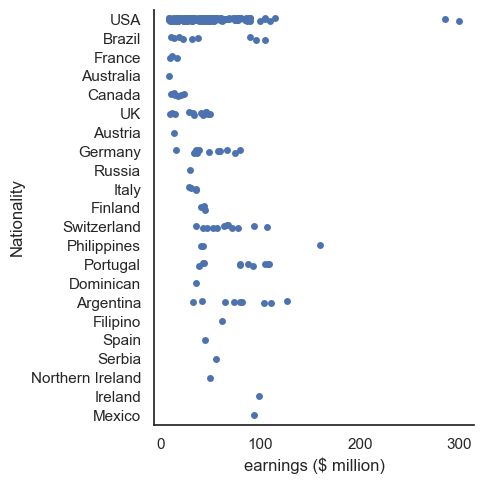

In [14]:
sns.catplot(data, x='earnings ($ million)', y="Nationality")

#### Figure 15

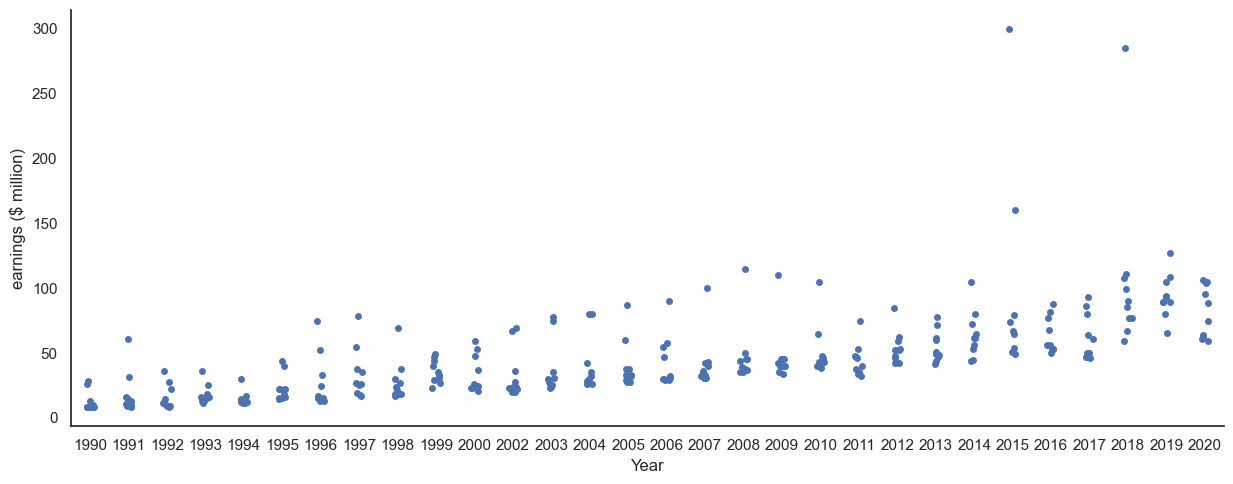

In [15]:
sns.catplot(data, x="Year", y='earnings ($ million)', aspect = 2.5)

For, Figure 13, the sport of boxing contains the highest paid athletes, with three clear outliers. An outlier is a data point that is significantly different from the others in the dataset. In this case, there are three athletes in boxing who earn significantly more than other athletes in the same sport. The earnings of athletes in other sports appear to be clustered on the lower end, which could make it difficult to use this feature in later analysis. This suggests that the sport of boxing may be more lucrative for athletes than other sports. However, it is important to note that outliers can sometimes skew the results of an analysis, and it may be necessary to investigate these outliers further to determine if they are legitimate data points or errors in the data.

Figure 14 shows the distribution of earnings by the nationality of the athletes. The figure reveals that there is a large number of US-born athletes present in the data, but the rest of the nationalities appear to be relatively evenly distributed in terms of earnings. There is less clustering of earnings by nationality in this figure than in Figure 9. It is important to note that the distribution of nationalities in the dataset may not be representative of the overall population of athletes, and this could potentially impact the generalizability of the results.

Figure 15 shows the relationship between earnings and the year in which the athlete earned those earnings. The analysis reveals another positive correlation between the two variables, supporting the earlier analysis of this relationship. A positive correlation means that as one variable (in this case, the year) increases, the other variable (earnings) also tends to increase. This finding suggests that athletes are earning more over time, which could be due to a variety of factors, such as changes in the sport, increases in viewership, or changes in sponsorship opportunities. However, it is important to note that correlation does not imply causation, and further analysis would be necessary to determine the underlying factors driving this relationship.

### Results of Analyzing the Top 20 Athletes In the Dataset

#### Figure 16

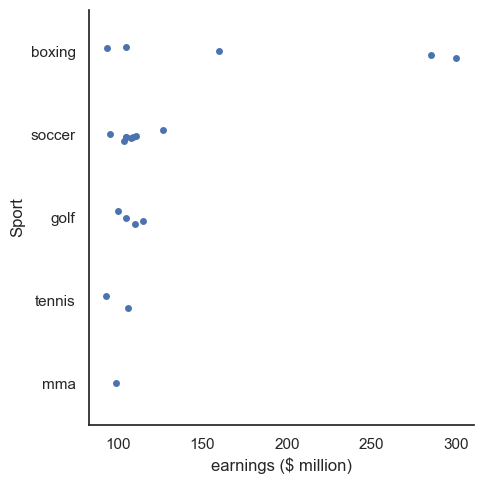

In [16]:
sorted_data= data.sort_values('earnings ($ million)', ascending=False)
top_20= sorted_data.head(20)
sns.catplot(top_20, x='earnings ($ million)', y="Sport")

#### Figure 17

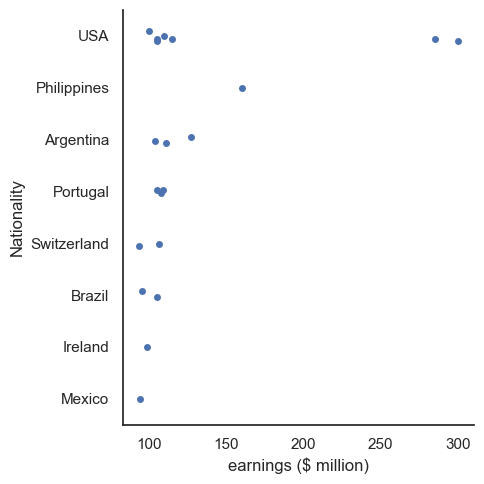

In [17]:
sns.catplot(top_20, x='earnings ($ million)', y="Nationality")

#### Figure 18

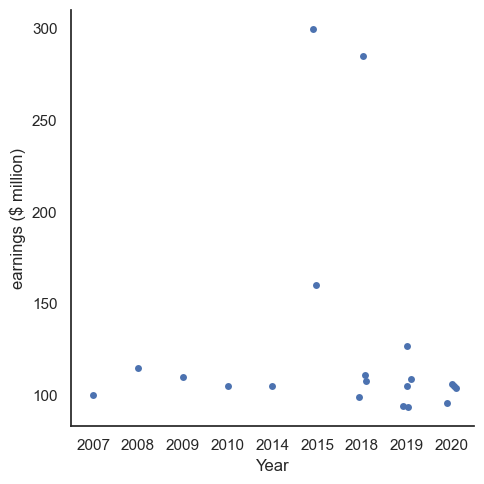

In [18]:
sns.catplot(top_20, x='Year', y="earnings ($ million)")

Figure 16 has a lot of similarities to the Figure 13. The top-3 highest paid athletes are still in the same sport obviously, but it is interesting to note that the distribution still looks similar as when the whole dataset is being analyzed this way. One possible explanation could be that boxing has a relatively small number of high-profile athletes who command the majority of the earnings in the sport. Additionally, it is worth pointing out that the only MMA datapoint is in the top-20 as well, which could suggest that MMA is a growing sport that is starting to attract higher earnings. Moving on to Figure 17, the most interesting detail is that US born athletes lead all the nationalities in the top-20. This could be due to the fact that the US has a larger sports industry compared to other countries and is therefore able to pay athletes more. Lastly, for Figure 18, there was an expectation that the earnings in the top-20 would increase with time but this is not actually the case. The top-paid athlete received their earnings in 2015 and there has not been any athlete nearly paid that high up to 2020. This could mean that the top-3 salaries may truly be outliers, or it could indicate that there has been a shift in the sports industry where earnings are not increasing at the same rate as they once were.

### Results of Shortlisting Promising Models

Starting in the right direction of testing Machine Learning(ML) models can be difficult at times. To begin, I will use some known, strong predicting ML models such as Random Forest Regressor, Gradient Boosting Regressor, and K-Nearest Neighbors.Random Forest Regressor builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting. It is a powerful model that can handle a large number of input features, and is often used in both regression and classification problems.The Gradient Boosting Regressor model builds an ensemble of decision trees sequentially, where each subsequent tree tries to correct the errors of the previous tree. It is also a powerful model that can handle a large number of input features, and can be used in both regression and classification problems.K-Nearest Neighbors classifies new data points based on the k-nearest neighbors in the training set. It is a simple but effective algorithm that can handle non-linear relationships between features and can be used for both regression and classification problems. All of these models will initially use 'Year', 'Sport', and Nationality as X features with 'earnings ($ million)' as the target feature. This is a good starting point as these variables have been identified as important in the analysis done previously. It's important to note that the performance of the models may vary depending on which variables are included in the model, as well as how those variables are preprocessed. To measure the success of the models, the data will be split into a 75% training set and a 25% testing set. Each model will be trained using the training set X features which then the model will try to predict the testing set target features. The performance of the respective model will be measured using R-Squared(R2) and mean-squared-error(MSE). R-Squared (R2) is a statistical measure that represents the proportion of the variance in the target variable that is explained by the independent variables in the model. It is a value between 0 and 1, where 0 indicates that the model explains none of the variability in the target variable and 1 indicates that the model explains all of the variability in the target variable.Mean Squared Error (MSE) is a measure of how well the model fits the data. It is the average of the squared differences between the predicted values and the actual values. A lower MSE indicates that the model is better at predicting the target variable. In the context of the ML models mentioned in the paragraph, R2 and MSE are used as evaluation metrics to measure the performance of each model. The R2 score indicates how well the model fits the data and how much of the variance in the target variable is explained by the features. The MSE score indicates how close the predicted values are to the actual values, with a lower MSE indicating better performance.This will give us an idea of how well each model is able to predict the earnings of the athletes based on these selected features. I will then compare the performance of each model to determine which one is the most accurate and useful for further analysis.  The next step would be to see which of the three features of that went into the model have the greatest affect on predicting by running the best performing estimator except with one feature per model rather than all of them combined. The same performance measures as before will be used to observe the importance of the feature when predicting.

#### Figure 19

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X_features = ['Nationality_Austria', 'Nationality_Brazil', 'Nationality_Canada',
       'Nationality_Dominican', 'Nationality_Filipino', 'Nationality_Finland',
       'Nationality_France', 'Nationality_Germany', 'Nationality_Ireland',
       'Nationality_Italy', 'Nationality_Mexico',
       'Nationality_Northern Ireland', 'Nationality_Philippines',
       'Nationality_Portugal', 'Nationality_Serbia', 'Nationality_Spain',
       'Nationality_Switzerland', 'Nationality_UK', 'Nationality_USA', 'Sport_american football / baseball',
       'Sport_auto racing', 'Sport_baseball', 'Sport_basketball',
       'Sport_boxing', 'Sport_cycling', 'Sport_golf', 'Sport_ice hockey',
       'Sport_mma', 'Sport_soccer', 'Sport_tennis', 'Year']
target = 'earnings ($ million)'
X_train, X_test, y_train, y_test = train_test_split(temp_data[X_features], temp_data[target], 
                                                        test_size = 0.25, random_state = 10)
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
    
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('R2:', R2)
print('MSE:', MSE)

R2: 0.7427284740508835
MSE: 192.1164808162232


#### Figure 20

In [99]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
    
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('R2:', R2)
print('MSE:', MSE)

R2: 0.7668894063191765
MSE: 174.07440148583663


#### Figure 21

In [100]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor() # initialize KNN model with 5 neighbors
knn.fit(X_train, y_train) # fit KNN model with training data
y_pred = knn.predict(X_test) # predict on test data

R2 = r2_score(y_test, y_pred) # calculate R2 score
MSE = mean_squared_error(y_test, y_pred) # calculate mean squared error

print('R2:', R2)
print('MSE:', MSE)

R2: 0.629270212517364
MSE: 276.8409828571429


#### Figure 22

<BarContainer object of 1 artists>

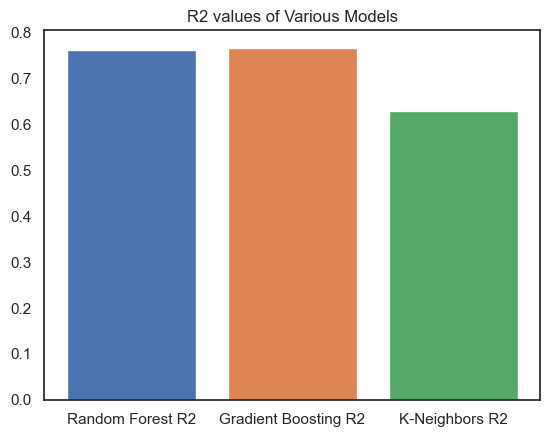

In [20]:
plt.figure()
plt.title("R2 values of Various Models")
plt.bar("Random Forest R2", 0.761)
plt.bar("Gradient Boosting R2", 0.766)
plt.bar("K-Neighbors R2", 0.629)

#### Figure 23

<BarContainer object of 1 artists>

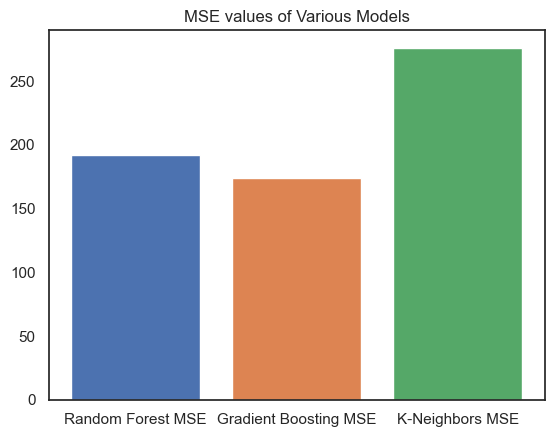

In [21]:
plt.figure()
plt.title("MSE values of Various Models")
plt.bar("Random Forest MSE", 192)
plt.bar("Gradient Boosting MSE", 174)
plt.bar("K-Neighbors MSE", 276)

The results obtained after utilizing the three ML models are remarkably promising. All three of the models yielded an R2 value above 0.60, which is quite impressive. After rounding off, it was observed that the GBR model (Figure 20) obtained the highest R2 value of 0.77, followed closely by the RFR model (Figure 19), which obtained an R2 value of 0.76. On the other hand, the KNNR model (Figure 21) performed comparatively worse, obtaining a value of 0.63. The MSE values were ranked in the same order as well, which indicates that the average error was also the smallest with the most accurate model out of the three. Now that we have these outcomes, I can advance to the next step, which involves fine-tuning the GBR model to achieve even better results. Therefore, the GBR estimator will be used to determine which feature matters the most when predicting by using the same performance metrics for each respective model.

#### Figure 22

In [104]:
X_nationality = ['Nationality_Austria', 'Nationality_Brazil', 'Nationality_Canada',
       'Nationality_Dominican', 'Nationality_Filipino', 'Nationality_Finland',
       'Nationality_France', 'Nationality_Germany', 'Nationality_Ireland',
       'Nationality_Italy', 'Nationality_Mexico',
       'Nationality_Northern Ireland', 'Nationality_Philippines',
       'Nationality_Portugal', 'Nationality_Serbia', 'Nationality_Spain',
       'Nationality_Switzerland', 'Nationality_UK', 'Nationality_USA']
target = 'earnings ($ million)'
X_train, X_test, y_train, y_test = train_test_split(temp_data[X_nationality], temp_data[target], 
                                                        test_size = 0.25, random_state = 10)
rfr = GradientBoostingRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
    
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('Nationality GBR R2:', R2)
print('Nationality GBR MSE:', MSE)

Nationality GBR R2: -0.00016451439980036398
Nationality GBR MSE: 746.8688423053851


#### Figure 23

In [105]:
X_sport = ['Sport_american football / baseball',
       'Sport_auto racing', 'Sport_baseball', 'Sport_basketball',
       'Sport_boxing', 'Sport_cycling', 'Sport_golf', 'Sport_ice hockey',
       'Sport_mma', 'Sport_soccer', 'Sport_tennis']
target = 'earnings ($ million)'
X_train, X_test, y_train, y_test = train_test_split(temp_data[X_sport], temp_data[target], 
                                                        test_size = 0.25, random_state = 10)
rfr = GradientBoostingRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
    
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('Sport GBR R2:', R2)
print('Sport GBR MSE:', MSE)

Sport GBR R2: 0.12481775370592896
Sport GBR MSE: 653.5388345467675


#### Figure 24

In [106]:
X_year = ['Year']
target = 'earnings ($ million)'
X_train, X_test, y_train, y_test = train_test_split(temp_data[X_year], temp_data[target], 
                                                        test_size = 0.25, random_state = 10)
rfr = GradientBoostingRegressor()
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)
    
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('Year GBR R2:', R2)
print('Year GBR MSE:', MSE)

Year GBR R2: 0.4795057013726358
Year GBR MSE: 388.67703127385664


#### Figure 25 and Figure 26

<BarContainer object of 1 artists>

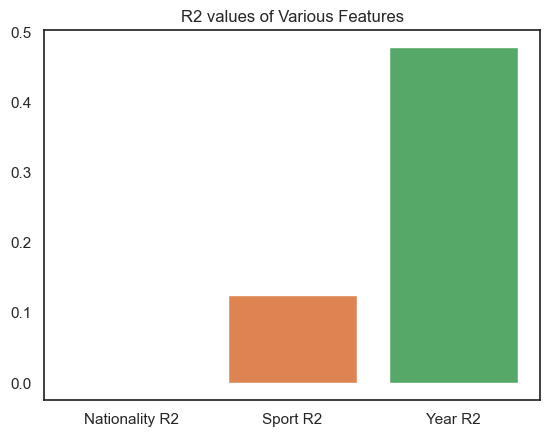

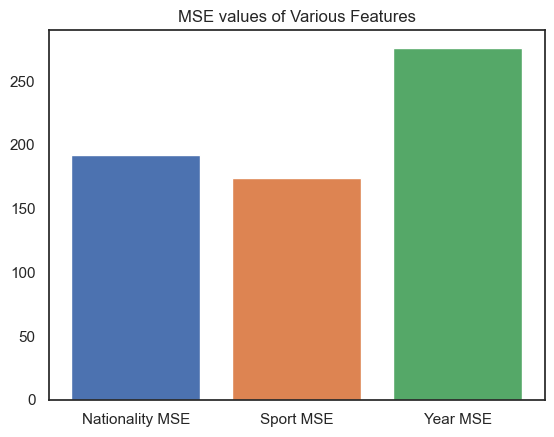

In [22]:
plt.figure()
plt.title("R2 values of Various Features")
plt.bar("Nationality R2", -0.00016451439980036398)
plt.bar("Sport R2", 0.12481775370592896)
plt.bar("Year R2", 0.4795057013726358)
plt.figure()
plt.title("MSE values of Various Features")
plt.bar("Nationality MSE", 192)
plt.bar("Sport MSE", 174)
plt.bar("Year MSE", 276)

When analyzing the features individually, it appears that Year (Figure 24) is by far the best predictor out of the three, with an R2 value of 0.48 when rounded, indicating that it explains nearly half of the variance in athlete earnings. Sport (Figure 23) was the next closest with an accuracy of 0.12, suggesting that it is a weaker predictor compared to Year. Interestingly, Nationality (Figure 22) had a negative R2 value, indicating that when used on its own, it may be more likely to incorrectly predict an athlete's salary. However, it is important to note that Nationality still plays a role in predicting athlete earnings when used in combination with other features such as Year and Sport. Overall, it appears that Year is the most important feature when it comes to predicting athlete earnings, followed by Sport and Nationality.

### Results of Fine-Tuning the Gradient Boosting Regressor (GBR) Model 

To further improve the predictive power of the GBR model, I can tweak its hyperparameters to find the optimal combination. Specifically, I can experiment with the learning rate, number of estimators, minimum samples split, and max depth. Learning rate controls the contribution of each tree in the ensemble, the number of estimators is the number of sequential trees to be modeled,represents the minimum number of samples required to split an internal node, and max depth is the maximum depth of each decision tree.To perform this optimization, I utilized a GridSearchCV object, which allows us to exhaustively search over the specified hyperparameter grid and evaluate each combination using cross-validation. After fitting the GridSearchCV object to the training data, I can obtain the best estimator, which is the GBR model with the optimal hyperparameters. Next, I will use this tuned model to make predictions on the test set and calculate its performance metrics. Finally, the best hyperparameters can be printed out and the same performance metrics used previously to evaluate the initial models. By doing so, I can ensure that the best possible model for our predictive purposes.

#### Figure 25

In [101]:
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingRegressor()# Create the model object

# Define the parameter grid to search over
param_grid = {'learning_rate': [0.1, 0.05, 0.01],
              'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
             'min_samples_split': [2, 5, 10]}

grid_search = GridSearchCV(gbr, param_grid, cv=10)# Create the GridSearchCV object with 10 cross validations


Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
R2: 0.7667239682701874
MSE: 174.19794168581652


In [103]:
grid_search.fit(X_train, y_train)# Fit the model

# Get the best estimator and use it to predict on the test set
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)

# Calculate performance metrics
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

# Print the results
print('Best parameters:', grid_search.best_params_)
print('R2:', R2)
print('MSE:', MSE)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
R2: 0.7666826230187335
MSE: 174.2288160866212


According to Figure 25, fine-tuning the GBR model did not decrease the performance of the model, which is great news. However, the process of fine-tuning the model did not result in any significant improvement of R2 or MSE either. Even though the fine-tuning process did not provide much improvement, it is still important to note that the model is capable of making relatively accurate predictions. This means that we can use the GBR model with confidence to make predictions on future earnings of athletes, as it can still provide a reasonable estimation of their potential earnings.